In [1]:
# Import necessary libraries
import seaborn as sns
import pandas as pd

# Load the "penguins" dataset
penguins = sns.load_dataset("penguins")

# Display the first 10 rows of the dataset
print(penguins.head(10))

# Print the shape of the dataset
print("\nShape of the dataset:", penguins.shape)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       36

In [2]:
# Display the column names and their data types
print("Column Names and Data Types:\n", penguins.dtypes)

# Check for missing values and print the count per column
print("\nMissing Values per Column:\n", penguins.isnull().sum())

# Print summary statistics of numerical columns
print("\nSummary Statistics of Numerical Columns:\n", penguins.describe())

# Print the unique values in each categorical column
print("\nUnique Values in Categorical Columns:")
for col in penguins.select_dtypes(include=['object']).columns:
    print(f"{col}: {penguins[col].unique()}")


Column Names and Data Types:
 species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Missing Values per Column:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Summary Statistics of Numerical Columns:
        bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.50

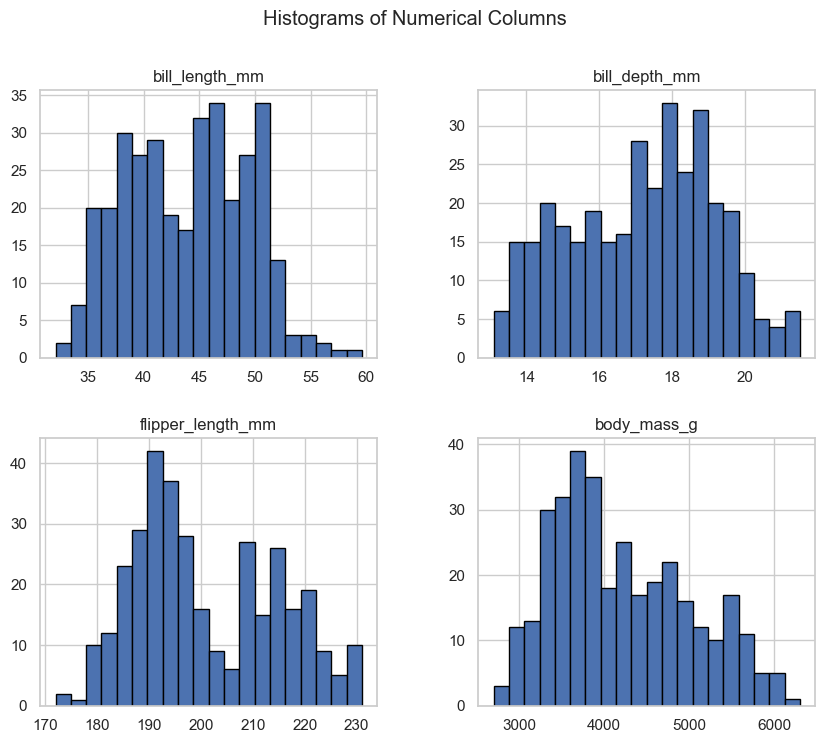

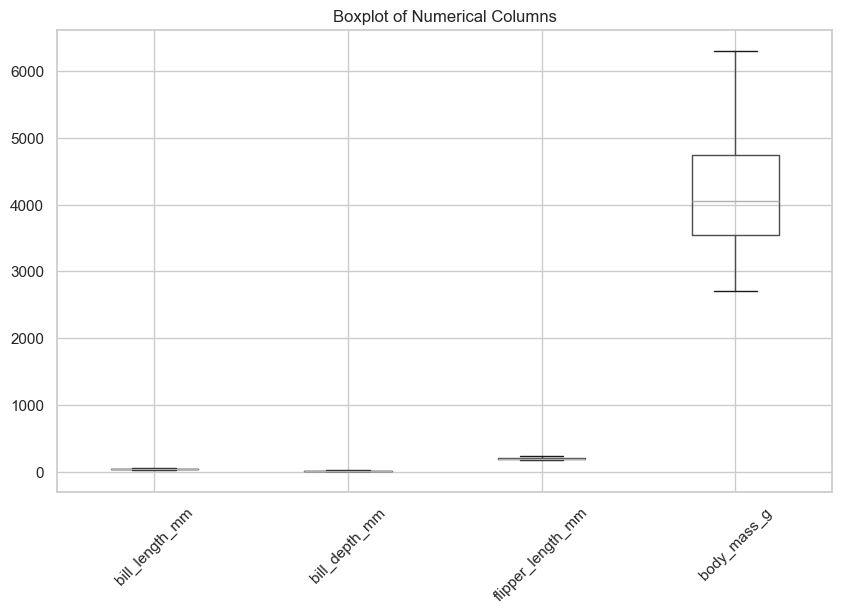

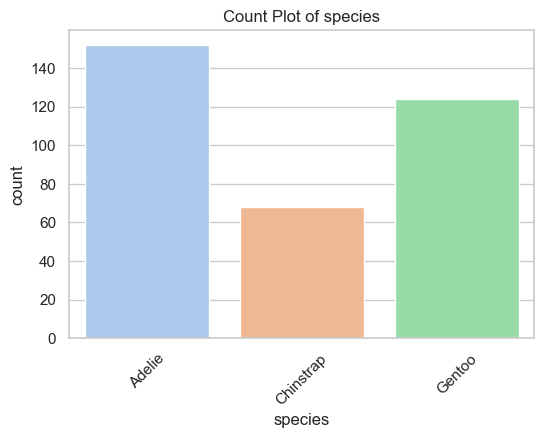

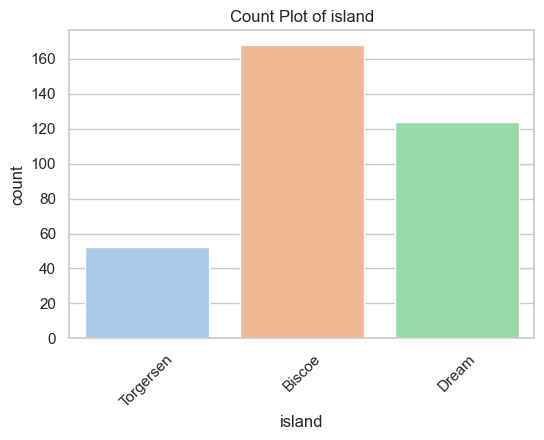

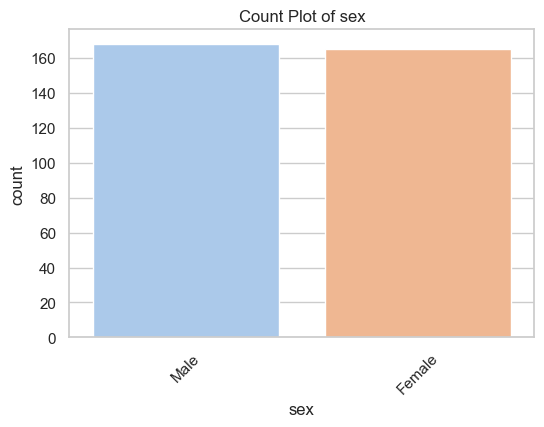


Skewness of Numerical Columns:
 bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64


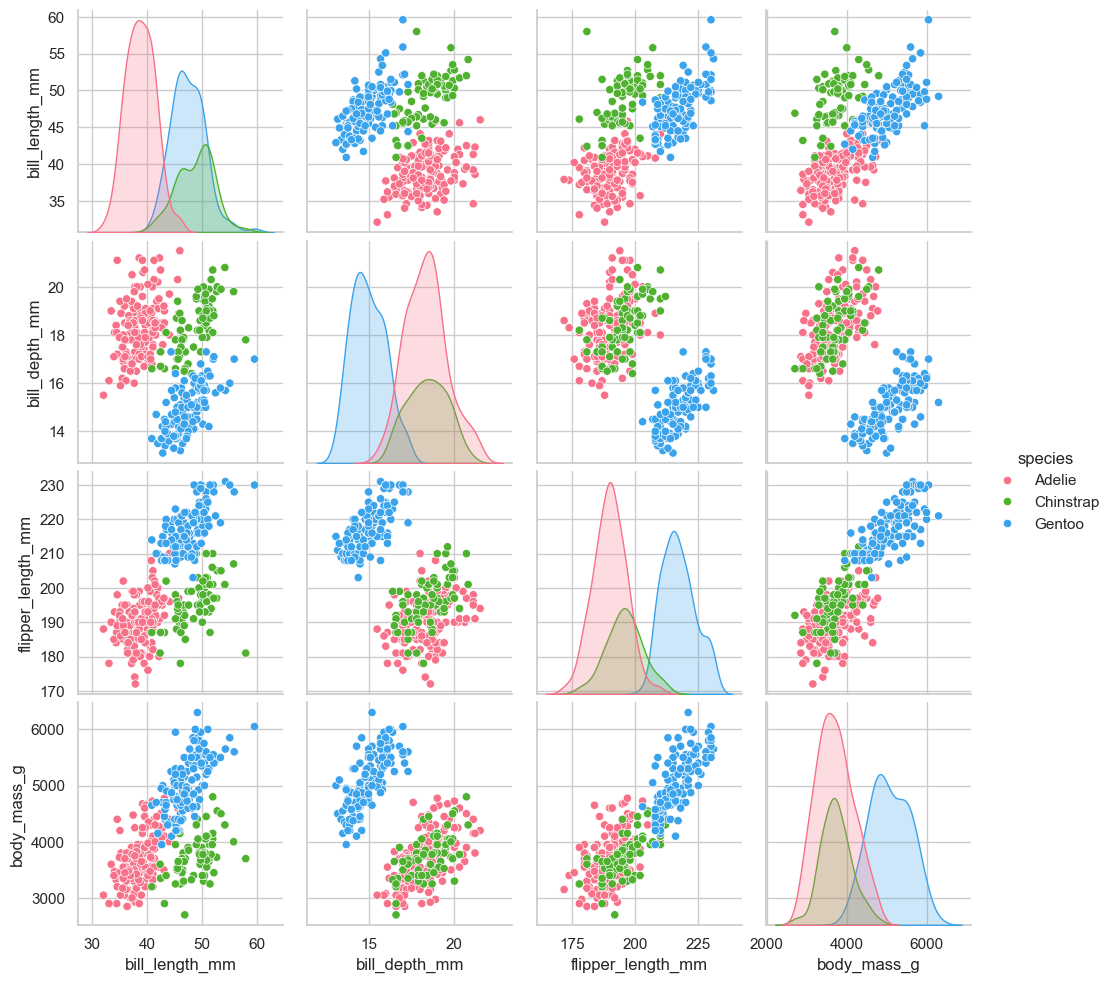

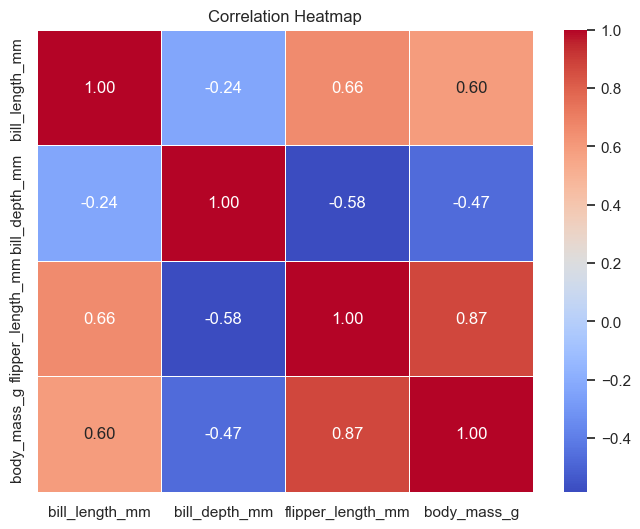

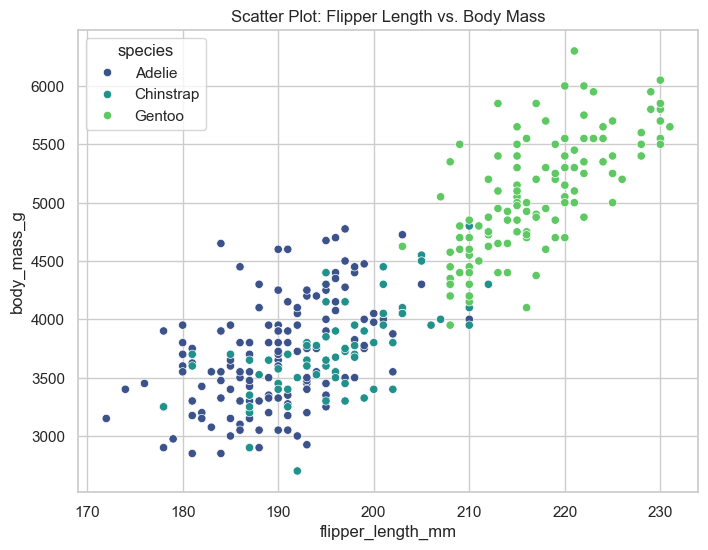

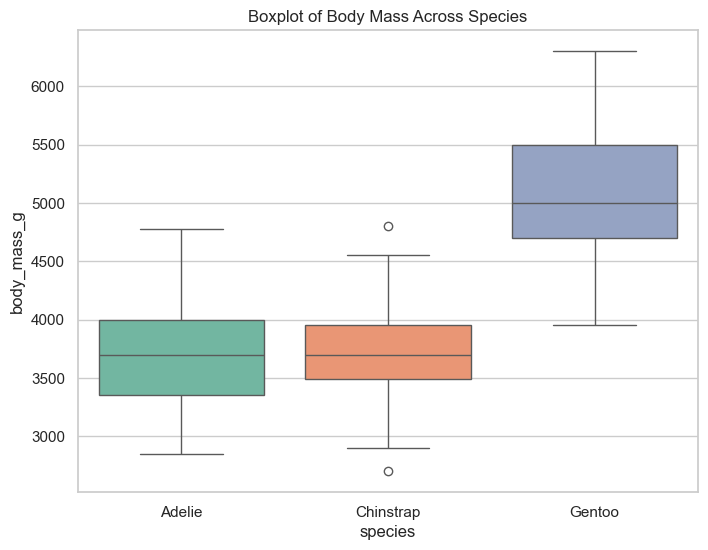

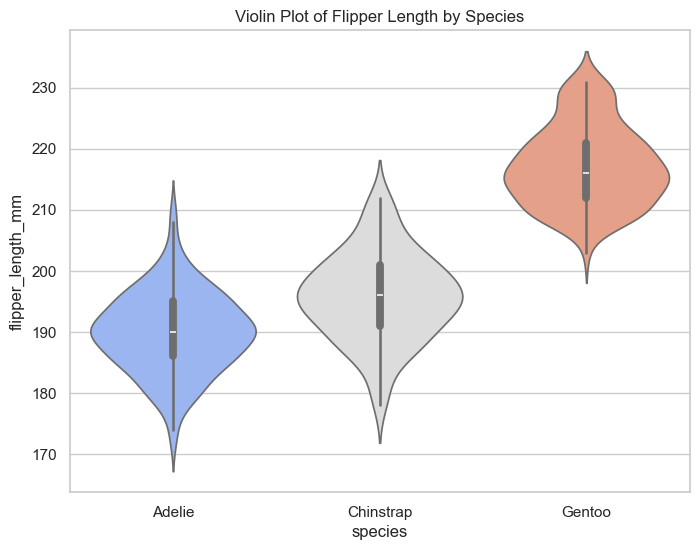

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Set the style for the plots
sns.set(style="whitegrid")

### A. Univariate Analysis ###

# i. Plot histograms for all numerical columns
penguins.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Columns")
plt.show()

# ii. Create a boxplot for each numerical column to identify outliers
plt.figure(figsize=(10, 6))
penguins.select_dtypes(include=['float64', 'int64']).boxplot()
plt.title("Boxplot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

# iii. Plot count plots for categorical variables
categorical_cols = penguins.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=penguins, x=col, hue=col, palette="pastel", legend=False)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# iv. Find and print the skewness of all numerical columns
numerical_cols = penguins.select_dtypes(include=['float64', 'int64']).columns
skewness = penguins[numerical_cols].skew()
print("\nSkewness of Numerical Columns:\n", skewness)


### B. Bivariate Analysis ###

# i. Use a pairplot to visualize relationships between numerical variables
sns.pairplot(penguins, hue="species", diag_kind="kde", palette="husl")
plt.show()

# ii. Create a heatmap to display the correlation matrix of numerical features
plt.figure(figsize=(8, 6))
numerical_penguins = penguins.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns
sns.heatmap(numerical_penguins.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# iii. Plot a scatter plot between flipper length and body mass
plt.figure(figsize=(8, 6))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species", palette="viridis")
plt.title("Scatter Plot: Flipper Length vs. Body Mass")
plt.show()

# iv. Create a boxplot to compare body mass across different species
plt.figure(figsize=(8, 6))
sns.boxplot(data=penguins, x="species", y="body_mass_g", hue="species", palette="Set2", legend=False)
plt.title("Boxplot of Body Mass Across Species")
plt.show()

# v. Use a violin plot to visualize the distribution of flipper length by species
plt.figure(figsize=(8, 6))
sns.violinplot(data=penguins, x="species", y="flipper_length_mm", hue="species", palette="coolwarm", legend=False)
plt.title("Violin Plot of Flipper Length by Species")
plt.show()


In [4]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values (optional but recommended for model training)
penguins.dropna(inplace=True)

# i. Select features (independent variables) and the target column (dependent variable)
X = penguins.drop(columns=["species"])  # Independent variables
y = penguins["species"]  # Target variable

# ii. Convert categorical columns to numerical using encoding techniques
# Encoding categorical columns using Label Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

# iii. Perform an 80-20 train-test split using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# iv. Print the shapes of X_train, X_test, y_train, and y_test
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (266, 6)
X_test shape: (67, 6)
y_train shape: (266,)
y_test shape: (67,)


In [5]:
# Import necessary libraries for feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select only numerical columns for scaling
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

### A. Standardization (Z-score Scaling)
# i. Apply StandardScaler to scale numerical features
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X[numerical_cols])

# ii. Convert standardized values back into a DataFrame with appropriate column names
X_standardized_df = pd.DataFrame(X_standardized, columns=numerical_cols, index=X.index)

# iii. Display the first 5 rows of the standardized dataset
print("\nStandardized Dataset (First 5 Rows):")
print(X_standardized_df.head())


### B. Normalization (Min-Max Scaling)
# i. Apply MinMaxScaler to scale numerical features
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X[numerical_cols])

# ii. Convert normalized values back into a DataFrame with appropriate column names
X_normalized_df = pd.DataFrame(X_normalized, columns=numerical_cols, index=X.index)

# iii. Display the first 5 rows of the normalized dataset
print("\nNormalized Dataset (First 5 Rows):")
print(X_normalized_df.head())


Standardized Dataset (First 5 Rows):
     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  1.889392       -0.896042       0.780732          -1.426752    -0.568475   
1  1.889392       -0.822788       0.119584          -1.069474    -0.506286   
2  1.889392       -0.676280       0.424729          -0.426373    -1.190361   
4  1.889392       -1.335566       1.085877          -0.569284    -0.941606   
5  1.889392       -0.859415       1.747026          -0.783651    -0.692852   

        sex  
0  0.991031  
1 -1.009050  
2 -1.009050  
4 -1.009050  
5  0.991031  

Normalized Dataset (First 5 Rows):
   island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex
0     1.0        0.254545       0.666667           0.152542     0.291667  1.0
1     1.0        0.269091       0.511905           0.237288     0.305556  0.0
2     1.0        0.298182       0.583333           0.389831     0.152778  0.0
4     1.0        0.167273       0.738095           0.355932  

In [6]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# ii. Set headers to mimic a real browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.9",
}

# Print confirmation
print("Libraries imported and headers set successfully.")

Libraries imported and headers set successfully.


In [19]:
# i. Find the URL of the iPhone listing page on Flipkart
url = "https://www.flipkart.com/search?q=apple+iphone"  # Flipkart iPhone listings page

# ii. Use the requests library to send a GET request to the page
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # iii. Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # iv. Print and inspect the HTML structure of the webpage
    # To avoid printing too much data, we'll print the first 1000 characters
    print(soup.prettify()[:1000])
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

Failed to retrieve the webpage. Status code: 529


In [17]:
# Define the eBay iPhone search URL
url = "https://www.ebay.com/sch/i.html?_nkw=iphone"

# Set headers to mimic a real browser request and avoid bot detection
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# Send a GET request to fetch the page
response = requests.get(url, headers=headers)

# Check if request was successful
if response.status_code == 200:
    print("Successfully fetched the eBay page!\n")
    
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all product listings on the page
    listings = soup.find_all("li", class_="s-item")

    # Define an empty list to store extracted iPhone data
    iphone_data = []

    for item in listings:
        try:
            # i. Extract product details
            name = item.find("h3", class_="s-item__title")  # Product Name
            price = item.find("span", class_="s-item__price")  # Price
            rating = item.find("div", class_="x-star-rating")  # Ratings
            reviews = item.find("span", class_="s-item__reviews-count")  # Number of Reviews
            status = item.find("span", class_="SECONDARY_INFO")  # Availability

            # ii. Append extracted details to the list
            iphone_data.append({
                "Product Name": name.text if name else "N/A",
                "Price": price.text if price else "N/A",
                "Ratings": rating.text if rating else "N/A",
                "Number of Reviews": reviews.text if reviews else "N/A",
                "Availability": status.text if status else "Available"
            })
        
        except Exception as e:
            print(f"Error extracting data: {e}")

    # Convert extracted data into a Pandas DataFrame
    df = pd.DataFrame(iphone_data)

    # Save the DataFrame as a CSV file
    df.to_csv("ebay_iphone_listings.csv", index=False)

    # Print the first 5 rows of the dataset
    print(df.head())

    # Confirm that data is saved
    print("\n✅ Data saved to ebay_iphone_listings.csv!")

else:
    print("❌ Failed to fetch eBay page. Status Code:", response.status_code)


Successfully fetched the eBay page!

  Product Name               Price              Ratings  \
0          N/A              $20.00                  N/A   
1          N/A              $20.00                  N/A   
2          N/A  $124.99 to $209.99                  N/A   
3          N/A  $204.99 to $214.99                  N/A   
4          N/A             $769.99  5.0 out of 5 stars.   

                                   Number of Reviews Availability  
0                                                N/A    Brand New  
1                                                N/A    Brand New  
2                                                N/A    Pre-Owned  
3                                                N/A    Pre-Owned  
4  3 product ratings - Mint Apple iPhone 15 Pro M...    Pre-Owned  

✅ Data saved to ebay_iphone_listings.csv!


In [11]:
# Check if request was successful
if response.status_code == 200:
    print("✅ Successfully fetched the eBay page!\n")

    # Parse HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all product listings on the page
    listings = soup.find_all("li", class_="s-item")

    # Define an empty list to store extracted iPhone data
    iphone_data = []

    for index, item in enumerate(listings):
        try:
            # i. Extract product details with error handling
            name_tag = item.find("h3", class_="s-item__title")
            price_tag = item.find("span", class_="s-item__price")
            rating_tag = item.find("div", class_="x-star-rating")  # Ratings
            reviews_tag = item.find("span", class_="s-item__reviews-count")  # Number of Reviews
            status_tag = item.find("span", class_="SECONDARY_INFO")  # Availability

            # i. Handle missing data with appropriate messages
            name = name_tag.text.strip() if name_tag else "❌ Product Name Missing"
            price = price_tag.text.strip() if price_tag else "❌ Price Not Listed"
            rating = rating_tag.text.strip() if rating_tag else "N/A"  # Some listings may not have ratings
            reviews = reviews_tag.text.strip() if reviews_tag else "0 Reviews"
            status = status_tag.text.strip() if status_tag else "Available"

            # iii. Print a warning for missing data
            if "❌" in (name, price):
                print(f"⚠️ Warning: Missing data in listing {index + 1}")

            # Append extracted details to the list
            iphone_data.append({
                "Product Name": name,
                "Price": price,
                "Ratings": rating,
                "Number of Reviews": reviews,
                "Availability": status
            })
        
        except Exception as e:
            print(f"❌ Error extracting data from listing {index + 1}: {e}")

    # Convert extracted data into a Pandas DataFrame
    df = pd.DataFrame(iphone_data)

    # Save the DataFrame as a CSV file
    df.to_csv("ebay_iphone_listings_errHandling.csv", index=False)

    # iii. Print the first 5 rows of the dataset
    print(df.head())

    # Confirm that data is saved
    print("\n✅ Data successfully saved to ebay_iphone_listings.csv!")

else:
    print("❌ Failed to fetch eBay page. Status Code:", response.status_code)


✅ Successfully fetched the eBay page!

             Product Name    Price Ratings Number of Reviews Availability
0  ❌ Product Name Missing   $20.00     N/A         0 Reviews    Brand New
1  ❌ Product Name Missing   $20.00     N/A         0 Reviews    Brand New
2  ❌ Product Name Missing  $172.00     N/A         0 Reviews    Pre-Owned
3  ❌ Product Name Missing  $355.00     N/A         0 Reviews    Pre-Owned
4  ❌ Product Name Missing  $355.00     N/A         0 Reviews   Parts Only

✅ Data successfully saved to ebay_iphone_listings.csv!


In [12]:
# iv. Check if request was successful
if response.status_code == 200:
    print("✅ Successfully fetched the eBay page!\n")
    
    # Parse HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all product listings on the page
    listings = soup.find_all("li", class_="s-item")

    # i. Define an empty list to store extracted iPhone data
    iphone_data = []

    for index, item in enumerate(listings):
        try:
            # Extract product details with error handling
            name_tag = item.find("h3", class_="s-item__title")
            price_tag = item.find("span", class_="s-item__price")
            rating_tag = item.find("div", class_="x-star-rating")  # Ratings
            reviews_tag = item.find("span", class_="s-item__reviews-count")  # Number of Reviews
            status_tag = item.find("span", class_="SECONDARY_INFO")  # Availability

            # Handle missing data with appropriate messages
            name = name_tag.text.strip() if name_tag else "❌ Product Name Missing"
            price = price_tag.text.strip() if price_tag else "❌ Price Not Listed"
            rating = rating_tag.text.strip() if rating_tag else "N/A"  # Some listings may not have ratings
            reviews = reviews_tag.text.strip() if reviews_tag else "0 Reviews"
            status = status_tag.text.strip() if status_tag else "Available"

            # Print a warning for missing data
            if "❌" in (name, price):
                print(f"⚠️ Warning: Missing data in listing {index + 1}")

            # Append extracted details to the list
            iphone_data.append({
                "Product Name": name,
                "Price": price,
                "Ratings": rating,
                "Number of Reviews": reviews,
                "Availability": status
            })
        
        except Exception as e:
            print(f"❌ Error extracting data from listing {index + 1}: {e}")

    # i. Convert extracted data into a Pandas DataFrame
    df = pd.DataFrame(iphone_data)

    # ii. Save the DataFrame as a CSV file
    df.to_csv("iphones_data.csv", index=False)

    # Print the first 5 rows of the dataset
    print(df.head())

    # Confirm that data is saved
    print("\n✅ Data successfully saved to iphones_data.csv!")

else:
    print("❌ Failed to fetch eBay page. Status Code:", response.status_code)

✅ Successfully fetched the eBay page!

             Product Name    Price Ratings Number of Reviews Availability
0  ❌ Product Name Missing   $20.00     N/A         0 Reviews    Brand New
1  ❌ Product Name Missing   $20.00     N/A         0 Reviews    Brand New
2  ❌ Product Name Missing  $172.00     N/A         0 Reviews    Pre-Owned
3  ❌ Product Name Missing  $355.00     N/A         0 Reviews    Pre-Owned
4  ❌ Product Name Missing  $355.00     N/A         0 Reviews   Parts Only

✅ Data successfully saved to iphones_data.csv!


📄 Scraping page 1...
📄 Scraping page 2...
📄 Scraping page 3...
📄 Scraping page 4...
📄 Scraping page 5...

✅ Data successfully saved to iphones_data_multi.csv!

📊 Performing Exploratory Data Analysis...


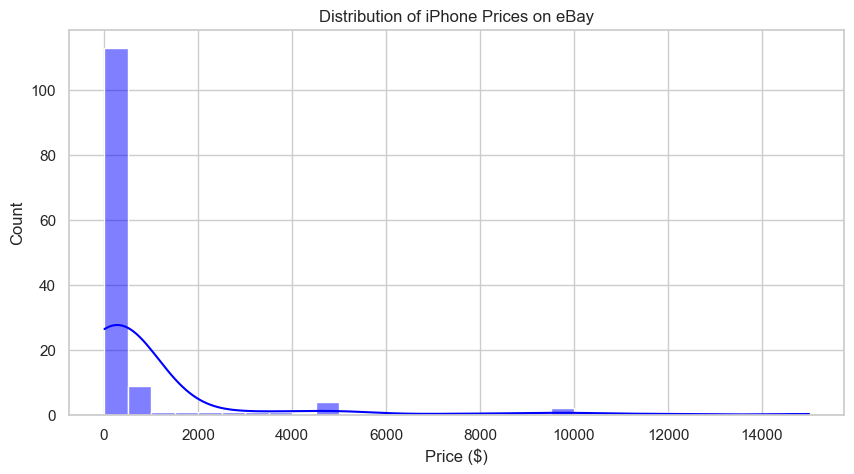


💰 Average iPhone Price: $966.40
⭐ Average iPhone Rating: 3.4/5

📌 Top 5 Most Expensive iPhones:
     Product Name  Price ($)  Ratings  Number of Reviews Availability
104    ❌ No Name    15000.0      0.0                0.0    Pre-Owned
115    ❌ No Name    12000.0      0.0                0.0    Pre-Owned
90     ❌ No Name    10000.0      4.5                3.0    Pre-Owned
89     ❌ No Name     9999.0      5.0                2.0    Pre-Owned
76     ❌ No Name     8900.0      4.0                9.0    Pre-Owned

📢 Top 5 Most Reviewed iPhones:
     Product Name  Price ($)  Ratings  Number of Reviews  \
98     ❌ No Name      90.20      5.0              394.0   
120    ❌ No Name     107.99      5.0              293.0   
51     ❌ No Name      89.99      4.5              251.0   
95     ❌ No Name     149.95      4.5              227.0   
128    ❌ No Name       7.74      4.5              157.0   

                Availability  
98        Good - Refurbished  
120       Good - Refurbished  
51     

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

# Function to extract iPhone details from a given eBay page
def scrape_ebay_iphones(page_num=1):
    url = f"https://www.ebay.com/sch/i.html?_nkw=iphone&_pgn={page_num}"

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        listings = soup.find_all("li", class_="s-item")

        iphone_data = []
        for index, item in enumerate(listings):
            try:
                name_tag = item.find("h3", class_="s-item__title")
                price_tag = item.find("span", class_="s-item__price")
                rating_tag = item.find("div", class_="x-star-rating")
                reviews_tag = item.find("span", class_="s-item__reviews-count")
                status_tag = item.find("span", class_="SECONDARY_INFO")

                name = name_tag.text.strip() if name_tag else "❌ No Name"
                price_text = price_tag.text.strip() if price_tag else "❌ No Price"
                rating = rating_tag.text.strip() if rating_tag else "N/A"
                reviews = reviews_tag.text.strip() if reviews_tag else "0 Reviews"
                status = status_tag.text.strip() if status_tag else "Available"

                # Extract numeric price (remove symbols)
                price_match = re.search(r"\d+[\.,]?\d*", price_text.replace(",", ""))
                price = float(price_match.group()) if price_match else None

                iphone_data.append({
                    "Product Name": name,
                    "Price ($)": price,
                    "Ratings": rating,
                    "Number of Reviews": reviews,
                    "Availability": status
                })

            except Exception as e:
                print(f"❌ Error extracting data on page {page_num}, listing {index + 1}: {e}")

        return iphone_data

    else:
        print(f"❌ Failed to fetch page {page_num}. Status Code: {response.status_code}")
        return []

# Scrape multiple pages (5 pages for demonstration)
all_iphone_data = []
for page in range(1, 6):
    print(f"📄 Scraping page {page}...")
    all_iphone_data.extend(scrape_ebay_iphones(page))
    time.sleep(2)  # Pause to avoid bot detection

# Convert to DataFrame & Save to CSV
df = pd.DataFrame(all_iphone_data)
df.to_csv("iphones_data_multi.csv", index=False)
print("\n✅ Data successfully saved to iphones_data_multi.csv!")

# ---------------------------------------------------------
# Task 6: Perform Basic Exploratory Data Analysis (EDA)
# ---------------------------------------------------------

print("\n📊 Performing Exploratory Data Analysis...")

# Drop rows with missing price values
df = df.dropna(subset=["Price ($)"])

# Convert "Number of Reviews" to numeric
df["Number of Reviews"] = df["Number of Reviews"].str.extract(r'(\d+)').astype(float).fillna(0)

# Convert "Ratings" to numeric (if available)
df["Ratings"] = df["Ratings"].str.extract(r'(\d+\.\d+)').astype(float).fillna(0)

# Price Distribution Plot
plt.figure(figsize=(10, 5))
sns.histplot(df["Price ($)"], bins=30, kde=True, color="blue")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title("Distribution of iPhone Prices on eBay")
plt.show()

# Average Price & Rating
avg_price = df["Price ($)"].mean()
avg_rating = df["Ratings"].mean()
print(f"\n💰 Average iPhone Price: ${avg_price:.2f}")
print(f"⭐ Average iPhone Rating: {avg_rating:.1f}/5")

# Top 5 Most Expensive iPhones
print("\n📌 Top 5 Most Expensive iPhones:\n", df.nlargest(5, "Price ($)"))

# Top 5 Most Reviewed iPhones
print("\n📢 Top 5 Most Reviewed iPhones:\n", df.nlargest(5, "Number of Reviews"))
